In [2]:
import pandas as pd
import random

%cd Downloads
data = pd.read_csv("400data_v2.csv")
sample = random.sample(list(range(len(data))), 100000)


C:\Users\isaacdu\Downloads


In [3]:
sampledata = data.iloc[sample,].loc[:,data.columns != "discount_amount"]
sampledata = sampledata.reset_index(drop = True).loc[:,sampledata.columns != "city"]
sampledata = sampledata.loc[:,sampledata.columns != "brand_cluster_Cluster_6"]

In [4]:
x = sampledata.loc[:, sampledata.columns != 'discount']
y = sampledata.loc[:, sampledata.columns == 'discount']

In [5]:
import sklearn
from sklearn import model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2, random_state=400)

In [7]:
from sklearn import linear_model
model = linear_model.LogisticRegressionCV(cv=10, random_state=400,n_jobs = 5,penalty="l1",solver = 'liblinear').fit(X_train, y_train)

C:\Users\isaacdu\.conda\envs\d2l\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
predictions = model.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, predictions)
acc

0.7777

C:\Users\isaacdu\.conda\envs\d2l\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isaacdu\.conda\envs\d2l\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isaacdu\.conda\envs\d2l\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\isaacdu\.conda\envs\d2l\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_s

{'C': 0.1, 'penalty': 'l2'}
Random Guess AUC = 0.5
Model AUC = 0.8410214092384019


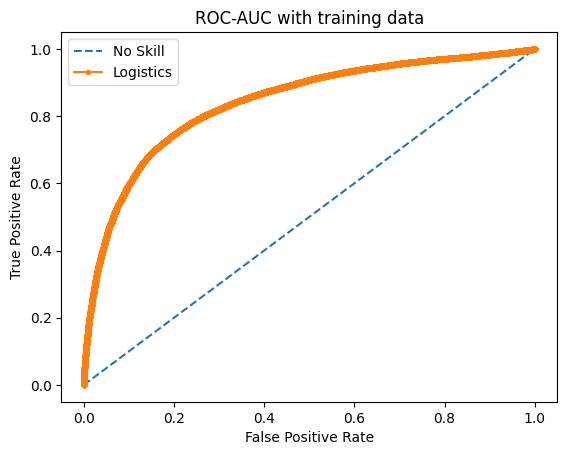

Random Guess AUC = 0.5
Model AUC = 0.8428276331751441


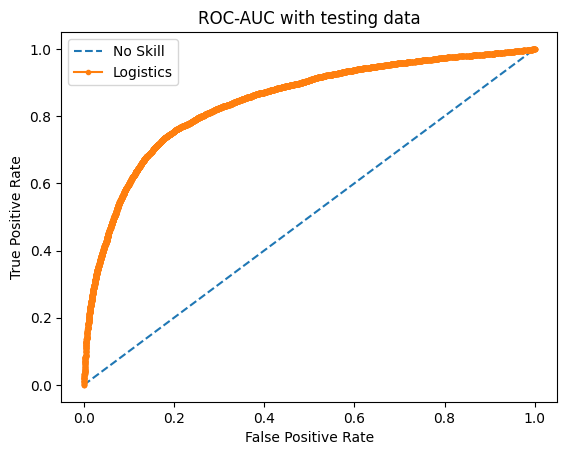

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
params = {
    "penalty": ['none', 'l1', 'l2'],
    "C": [0.01,0.1,1,2,5,10]
}

rf = GridSearchCV(LogisticRegression(), params, n_jobs=5, scoring='roc_auc', cv=10)

rf.fit(X_train, y_train)

print(rf.best_params_)

## train result
# get the probabilities for testing data
y_prob = rf.predict_proba(X_train)[:, 1]
# roc auc
line = [0 for _ in range(len(y_train))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(y_train, line)
model_auc = roc_auc_score(y_train, y_prob)
print(f'Random Guess AUC = {line_auc}') # should be 0.5 for sanity check
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, line)
lr_fpr, lr_tpr, _ = roc_curve(y_train, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistics')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with training data')
# show the legend
plt.legend()
# show the plot
plt.show()


## test result
# get the probabilities for testing data
y_prob = rf.predict_proba(X_test)[:, 1]
# roc auc
line = [0 for _ in range(len(y_test))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(y_test, line)
model_auc = roc_auc_score(y_test, y_prob)
print(f'Random Guess AUC = {line_auc}') # should be 0.5 for sanity check
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, line)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistics')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with testing data')
# show the legend
plt.legend()
# show the plot
plt.show()

C:\Users\isaacdu\.conda\envs\d2l\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=5)
Random Guess AUC = 0.5
Model AUC = 0.8100161420789289


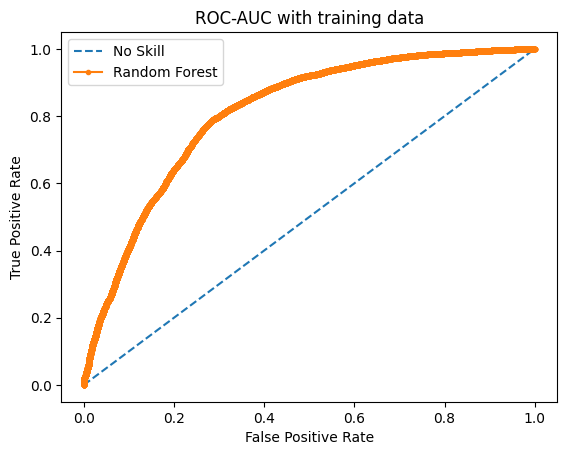

Random Guess AUC = 0.5
Model AUC = 0.8049469671411367


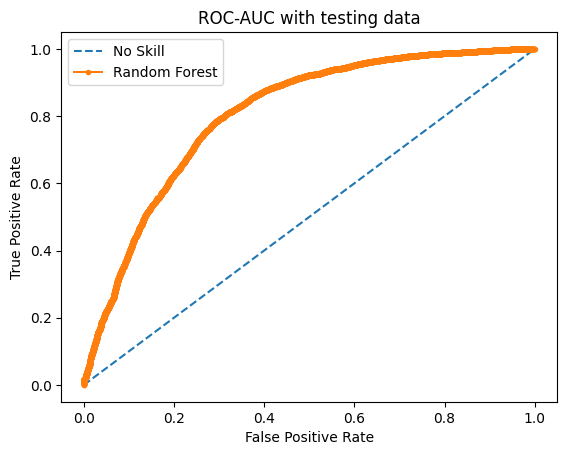

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

params = {
    'n_estimators': [15,50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5],
    'min_samples_leaf': [1, 3]
}

rf = GridSearchCV(RandomForestClassifier(), params, n_jobs=5, scoring='roc_auc', cv=5)

rf.fit(X_train, y_train)

print(rf.best_estimator_)

## train result
# get the probabilities for testing data
y_prob = rf.predict_proba(X_train)[:, 1]
# roc auc
line = [0 for _ in range(len(y_train))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(y_train, line)
model_auc = roc_auc_score(y_train, y_prob)
print(f'Random Guess AUC = {line_auc}') # should be 0.5 for sanity check
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, line)
lr_fpr, lr_tpr, _ = roc_curve(y_train, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with training data')
# show the legend
plt.legend()
# show the plot
plt.show()

## test result
# get the probabilities for testing data
y_prob = rf.predict_proba(X_test)[:, 1]
# roc auc
line = [0 for _ in range(len(y_test))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(y_test, line)
model_auc = roc_auc_score(y_test, y_prob)
print(f'Random Guess AUC = {line_auc}') # should be 0.5 for sanity check
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, line)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with testing data')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn import svm

params = {
    "kernel":["linear", "poly"]
}

rf = GridSearchCV(svm.SVC(), params, n_jobs=-1, scoring='roc_auc', cv=4)

rf.fit(X_train, y_train)

print(rf.best_estimator_)

## train result
# get the probabilities for testing data
y_prob = rf.predict_proba(train_x)[:, 1]
# roc auc
line = [0 for _ in range(len(train_y))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(y_train, line)
model_auc = roc_auc_score(y_train, y_prob)
print(f'Random Guess AUC = {line_auc}') # should be 0.5 for sanity check
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, line)
lr_fpr, lr_tpr, _ = roc_curve(y_train, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with training data')
# show the legend
plt.legend()
# show the plot
plt.show()


## test result
# get the probabilities for testing data
y_prob = rf.predict_proba(X_test)[:, 1]
# roc auc
line = [0 for _ in range(len(y_test))] # making straight line in ROC AUC graph (random guessing)
line_auc = roc_auc_score(y_test, line)
model_auc = roc_auc_score(y_test, y_prob)
print(f'Random Guess AUC = {line_auc}') # should be 0.5 for sanity check
print(f'Model AUC = {model_auc}') # see the AUC score of our model
# generate the curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, line)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with testing data')
# show the legend
plt.legend()
# show the plot
plt.show()